# Captura de mudanças no ambiente através da webcam

In [3]:
import cv2

# Abrir o vídeo
cam = cv2.VideoCapture(0)  # Troque pelo caminho do seu vídeo

# Ler o primeiro frame como referência de fundo
ret, frame_reference = cam.read()
if not ret:
    print("Erro ao carregar o vídeo")
    cam.release()
    exit()

frame_reference = cv2.flip(frame_reference, 1) 
# Converter o frame de referência para escala de cinza
frame_reference_gray = cv2.cvtColor(frame_reference, cv2.COLOR_BGR2GRAY)
frame_reference_gray = cv2.GaussianBlur(frame_reference_gray, (21, 21), 0)

while True:
    ret, frame = cam.read()

    if not ret:
        break
    
    frame = cv2.flip(frame, 1) 
    # frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
    # Converter o frame atual para escala de cinza e aplicar suavização
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.GaussianBlur(frame_gray, (21, 21), 0)

    # Subtrair o frame de referência do frame atual para detectar mudanças
    frame_delta = cv2.absdiff(frame_reference_gray, frame_gray)

    # Aplicar o thresholding para obter a imagem binária das mudanças
    _, thresh = cv2.threshold(frame_delta, 25, 255, cv2.THRESH_BINARY)

    # Dilatar a imagem para preencher buracos nos contornos
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Encontrar contornos das mudanças
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Desenhar retângulos ao redor das áreas detectadas
    for contour in contours:
        if cv2.contourArea(contour) < 500:  # Ignorar pequenas áreas
            continue
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Mostrar o frame com as detecções
    cv2.imshow('Deteccao de Mudancas', frame)
    cv2.imshow('Thresh', thresh)
    cv2.imshow('Frame Delta', frame_delta)

    # Pressione 'q' para sair
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Liberar o vídeo e fechar as janelas
cam.release()
cv2.destroyAllWindows()


# Captura de mudanças no ambiente de um vídeo

In [11]:
import cv2

# Abrir o vídeo
cap = cv2.VideoCapture('../notebooks/heavy_object.mp4')  # Troque pelo caminho do seu vídeo

# Ler o primeiro frame como referência de fundo
ret, frame_reference = cap.read()
if not ret:
    print("Erro ao carregar o vídeo")
    cap.release()
    exit()

frame_reference = cv2.resize(frame_reference, (0,0), fx=0.5, fy=0.5)

# Converter o frame de referência para escala de cinza
frame_reference_gray = cv2.cvtColor(frame_reference, cv2.COLOR_BGR2GRAY)
frame_reference_gray = cv2.GaussianBlur(frame_reference_gray, (21, 21), 0)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    
    frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
    # Converter o frame atual para escala de cinza e aplicar suavização
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.GaussianBlur(frame_gray, (21, 21), 0)

    # Subtrair o frame de referência do frame atual para detectar mudanças
    frame_delta = cv2.absdiff(frame_reference_gray, frame_gray)

    # Aplicar o thresholding para obter a imagem binária das mudanças
    _, thresh = cv2.threshold(frame_delta, 25, 255, cv2.THRESH_BINARY)

    # Dilatar a imagem para preencher buracos nos contornos
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Encontrar contornos das mudanças
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Desenhar retângulos ao redor das áreas detectadas
    for contour in contours:
        if cv2.contourArea(contour) < 500:  # Ignorar pequenas áreas
            continue
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Mostrar o frame com as detecções
    cv2.imshow('Deteccao de Mudancas', frame)
    cv2.imshow('Thresh', thresh)
    cv2.imshow('Frame Delta', frame_delta)

    # Pressione 'q' para sair
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Liberar o vídeo e fechar as janelas
cap.release()
cv2.destroyAllWindows()


# Reconhecimento de expressões faciais

In [6]:
import cv2
import dlib
from imutils import face_utils

# Carregar o detector de faces do dlib e o preditor de landmarks faciais
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Caminho do arquivo baixado

# Função para calcular a razão de aspecto da boca (detecção de sorriso)
def mouth_aspect_ratio(mouth):
    A = cv2.norm(mouth[3] - mouth[9])  # Distância vertical
    B = cv2.norm(mouth[0] - mouth[6])  # Distância horizontal
    mar = A / B
    return mar

# Abrir o vídeo
cap = cv2.VideoCapture(0)  # Substitua pelo caminho do seu vídeo

# Laço de leitura do vídeo
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = cv2.flip(frame, 1) 
    # Converter o frame para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar rostos no frame
    faces = detector(gray)

    for face in faces:
        # Prever landmarks faciais
        shape = predictor(gray, face)
        shape = face_utils.shape_to_np(shape)

        # Pegar coordenadas da boca (pontos de 48 a 68)
        mouth = shape[48:68]

        # Desenhar a boca no frame
        cv2.drawContours(frame, [mouth], -1, (0, 255, 0), 1)

        # Calcular a razão de aspecto da boca (indicador de sorriso)
        mar = mouth_aspect_ratio(mouth)

        # Definir um limite para detecção de sorriso
        if mar > 0.4:
            cv2.putText(frame, "Sorrindo", (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        else:
            cv2.putText(frame, "Serio", (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Mostrar o frame com a detecção
    cv2.imshow('Reconhecimento de Expressoes', frame)

    # Pressione 'q' para sair
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Liberar o vídeo e fechar as janelas
cap.release()
cv2.destroyAllWindows()


## Eye tracking

In [7]:
import cv2
import dlib
import numpy as np
from imutils import face_utils

# Carregar o detector de faces do dlib e o preditor de landmarks faciais
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Caminho para o arquivo baixado

def get_eye_center(eye):
    # Calcular o centro do olho com base na média das coordenadas dos landmarks
    center_x = int(np.mean(eye[:, 0]))
    center_y = int(np.mean(eye[:, 1]))
    return (center_x, center_y)

# Função para desenhar uma linha sobre o olho
def draw_eye_lines(eye, frame):
    # Desenhar as linhas ao redor do olho
    for i in range(1, len(eye)):
        cv2.line(frame, tuple(eye[i - 1]), tuple(eye[i]), (0, 255, 0), 1)
    cv2.line(frame, tuple(eye[0]), tuple(eye[-1]), (0, 255, 0), 1)

# Abrir o vídeo
cap = cv2.VideoCapture(0)  # Use 0 para webcam ou substitua pelo caminho de um vídeo

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break

    # Converter o frame para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar rostos no frame
    faces = detector(gray)

    for face in faces:
        # Prever landmarks faciais
        shape = predictor(gray, face)
        shape = face_utils.shape_to_np(shape)

        # Obter as coordenadas dos olhos (landmarks 36-41 para o olho esquerdo, 42-47 para o olho direito)
        left_eye = shape[36:42]
        right_eye = shape[42:48]

        # Desenhar os contornos dos olhos
        draw_eye_lines(left_eye, frame)
        draw_eye_lines(right_eye, frame)

        # Calcular o centro dos olhos
        left_eye_center = get_eye_center(left_eye)
        right_eye_center = get_eye_center(right_eye)

        # Desenhar os centros dos olhos
        cv2.circle(frame, left_eye_center, 3, (0, 0, 255), -1)
        cv2.circle(frame, right_eye_center, 3, (0, 0, 255), -1)

        # Desenhar retângulos ao redor dos olhos
        l_x, l_y, l_w, l_h = cv2.boundingRect(left_eye)
        r_x, r_y, r_w, r_h = cv2.boundingRect(right_eye)
        cv2.rectangle(frame, (l_x, l_y), (l_x + l_w, l_y + l_h), (255, 0, 0), 1)
        cv2.rectangle(frame, (r_x, r_y), (r_x + r_w, r_y + r_h), (255, 0, 0), 1)

    # Mostrar o frame com as detecções
    cv2.imshow('Eye Tracking', frame)

    # Pressione 'q' para sair
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar o vídeo e fechar as janelas
cap.release()
cv2.destroyAllWindows()


# Reconhecimento das mãos esquerda e direita

In [4]:
# Importing Libraries 
import cv2 
import mediapipe as mp 
  
# Used to convert protobuf message  
# to a dictionary. 
from google.protobuf.json_format import MessageToDict 


# Initializing the Model 
mpHands = mp.solutions.hands 
hands = mpHands.Hands( 
    static_image_mode=False, 
    model_complexity=1, 
    min_detection_confidence=0.75, 
    min_tracking_confidence=0.75, 
    max_num_hands=2) 


# Start capturing video from webcam 
cap = cv2.VideoCapture(0) 
  
while True: 
    
    # Read video frame by frame 
    success, img = cap.read() 
  
    # Flip the image(frame) 
    img = cv2.flip(img, 1) 
  
    # Convert BGR image to RGB image 
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  
    # Process the RGB image 
    results = hands.process(imgRGB) 
  
    # If hands are present in image(frame) 
    if results.multi_hand_landmarks: 
  
        # Both Hands are present in image(frame) 
        if len(results.multi_handedness) == 2: 
                # Display 'Both Hands' on the image 
            cv2.putText(img, 'Both Hands', (250, 50), 
                        cv2.FONT_HERSHEY_COMPLEX, 0.9, 
                        (0, 255, 0), 2) 
  
        # If any hand present 
        else: 
            for i in results.multi_handedness: 
                
                # Return whether it is Right or Left Hand 
                label = MessageToDict(i)[ 
                    'classification'][0]['label'] 
  
                if label == 'Left': 
                    
                    # Display 'Left Hand' on left side of window 
                    cv2.putText(img, label+' Hand', (20, 50), 
                                cv2.FONT_HERSHEY_COMPLEX, 0.9, 
                                (0, 255, 0), 2) 
  
                if label == 'Right': 
                    
                    # Display 'Left Hand' on left side of window 
                    cv2.putText(img, label+' Hand', (460, 50), 
                                cv2.FONT_HERSHEY_COMPLEX, 
                                0.9, (0, 255, 0), 2) 
  
    # Display Video and when 'q' is entered, destroy the window 
    cv2.imshow('Image', img) 
    if cv2.waitKey(1) & 0xff == ord('q'): 
        break
    
cv2.destroyAllWindows()

I0000 00:00:1727132127.752174    7888 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1727132127.753746    8113 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) HD Graphics 5500 (BDW GT2)
[ WARN:0@108.994] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@108.994] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
W0000 00:00:1727132127.807286    8108 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


W0000 00:00:1727132127.846944    8107 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


# Gun detect

Guns detected


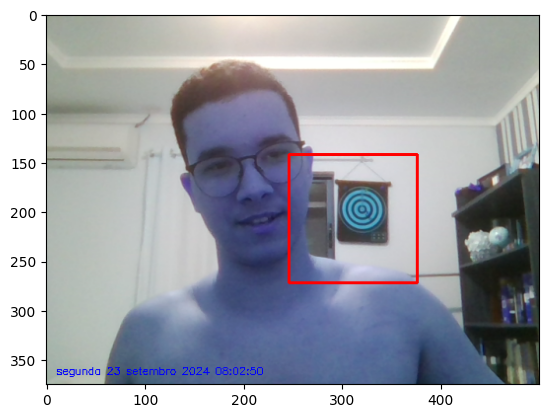

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import datetime

gun_cascade = cv2.CascadeClassifier('cascade.xml')
camera = cv2.VideoCapture(0)
firstFrame = None
gun_exist = False
while True:
	ret, frame = camera.read()
	if frame is None:
		break
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	gun = gun_cascade.detectMultiScale(gray, 1.3, 20, minSize=(100, 100))
	if len(gun) > 0:
		gun_exist = True
	for (x, y, w, h) in gun:
		frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
		roi_gray = gray[y:y + h, x:x + w]
		roi_color = frame[y:y + h, x:x + w]
	if firstFrame is None:
		firstFrame = gray
		continue
	cv2.putText(frame, datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S %p"),
				(10, frame.shape[0] - 10),
				cv2.FONT_HERSHEY_SIMPLEX,
				0.35, (0, 0, 255), 1)
	if gun_exist:
		print("Guns detected")
		plt.imshow(frame)
		break
	else:
		cv2.imshow("Security Feed", frame)
	key = cv2.waitKey(1) & 0xFF
	if key == ord('q'):
		break

camera.release()
cv2.destroyAllWindows()


# Iluminação com os dedos

In [1]:
# Importing Libraries 
import cv2 
import mediapipe as mp 
from math import hypot 
import screen_brightness_control as sbc 
import numpy as np 

# Initializing the Model 
mpHands = mp.solutions.hands 
hands = mpHands.Hands( 
	static_image_mode=False, 
	model_complexity=1, 
	min_detection_confidence=0.75, 
	min_tracking_confidence=0.75, 
	max_num_hands=2) 

Draw = mp.solutions.drawing_utils 

# Start capturing video from webcam 
cap = cv2.VideoCapture(0) 

while True: 
	# Read video frame by frame 
	_, frame = cap.read() 

	# Flip image 
	frame = cv2.flip(frame, 1) 

	# Convert BGR image to RGB image 
	frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 

	# Process the RGB image 
	Process = hands.process(frameRGB) 

	landmarkList = [] 
	# if hands are present in image(frame) 
	if Process.multi_hand_landmarks: 
		# detect handmarks 
		for handlm in Process.multi_hand_landmarks: 
			for _id, landmarks in enumerate(handlm.landmark): 
				# store height and width of image 
				height, width, color_channels = frame.shape 

				# calculate and append x, y coordinates 
				# of handmarks from image(frame) to lmList 
				x, y = int(landmarks.x*width), int(landmarks.y*height) 
				landmarkList.append([_id, x, y]) 

			# draw Landmarks 
			Draw.draw_landmarks(frame, handlm, 
								mpHands.HAND_CONNECTIONS) 

	# If landmarks list is not empty 
	if landmarkList != []: 
		# store x,y coordinates of (tip of) thumb 
		x_1, y_1 = landmarkList[4][1], landmarkList[4][2] 

		# store x,y coordinates of (tip of) index finger 
		x_2, y_2 = landmarkList[8][1], landmarkList[8][2] 

		# draw circle on thumb and index finger tip 
		cv2.circle(frame, (x_1, y_1), 7, (0, 255, 0), cv2.FILLED) 
		cv2.circle(frame, (x_2, y_2), 7, (0, 255, 0), cv2.FILLED) 

		# draw line from tip of thumb to tip of index finger 
		cv2.line(frame, (x_1, y_1), (x_2, y_2), (0, 255, 0), 3) 

		# calculate square root of the sum of 
		# squares of the specified arguments. 
		L = hypot(x_2-x_1, y_2-y_1) 

		# 1-D linear interpolant to a function 
		# with given discrete data points 
		# (Hand range 15 - 220, Brightness 
		# range 0 - 100), evaluated at length. 
		b_level = np.interp(L, [15, 220], [0, 100]) 

		# set brightness 
		sbc.set_brightness(int(b_level)) 

	# Display Video and when 'q' is entered, destroy 
	# the window 
	cv2.imshow('Image', frame) 
	if cv2.waitKey(1) & 0xff == ord('q'): 
		break

cv2.destroyAllWindows()

I0000 00:00:1727135735.319654   11786 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1727135735.335662   11837 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) HD Graphics 5500 (BDW GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1727135735.419763   11830 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727135735.452319   11828 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727135737.541433   11829 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/home/matheus/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: Use